<img src="image/ai0/Title_Security Camera.png" width=1000>

## 이미지 비교
물체를 감지하는 원리는 다음과 같은 이미지 비교입니다.   
화면의 차이가 얼마나 되는가는 다음과 같은 방식으로 측정하게 됩니다.

<img src="image/ai0/security_cam_02.png" width=840>

<img src="image/ai0/security_cam_03.png" width=840>

<br>

# 보안 카메라
연속적으로 화면을 비교해서 다른 부분이 일정 값보다 크다면 알려줍니다.

침입자 발생!


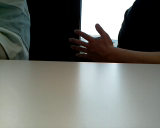

Closing PiCamera


In [2]:
from zumi.zumi import Zumi
from zumi.util.screen import Screen
from zumi.util.camera import Camera
import PIL.Image
import cv2
import IPython.display
import time

zumi = Zumi()
screen = Screen()
camera = Camera()
camera.start_camera()

screen.close_eyes()

# 민감도 : 작을수록 민감도가 높음, 최소 값 : 1.5
sensitivity = 5 

# 원하는 시간동안만 프로그램을 작동시키기 위한 설정
time_out = 10 # 입력한 시간(초) 동안 감지
time_start = time.time()
time_elapsed = 0

print("감지 시작!")

try:
    while time_elapsed < time_out:
        # 시간을 체크 합니다.
        time_elapsed = time.time()-time_start
        
        
        # 2장의 이미지를 비교하기 쉽도록 흑백으로 변환합니다.
        image = camera.capture()        
        gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)        
        image = camera.capture()
        gray2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
        
        # 연속된 간격으로 사진을 촬영하여 2장의 이미지를 비교합니다.
        frameDelta = cv2.absdiff(gray1, gray2)        
        min_pix_value = 2
        ret, thresh = cv2.threshold(frameDelta,min_pix_value,255,cv2.THRESH_BINARY)            
        contoursArray = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
        
        # 이미지의 크기를 구합니다.
        height, width, channels = image.shape
        width = int(width/2)
        height = int(height/2)
        
        if len(contoursArray) > 0:    
            
            # 감지된 영역의 크기를 구합니다.
            countour = contoursArray[-1]        
            x, y, w, h = cv2.boundingRect(countour)            
            area = w*h         
            
            # 민감도가 1.5보다 낮지 않도록 합니다.
            if(sensitivity < 10) :
                sensitivity = 10
                
            # 감지영역이 설정 값보다 큰지 확인합니다.
            if(area > width*height/sensitivity):
                                
                IPython.display.clear_output(wait=True)     
                
                # 감지가 상태일 때                
                print("침입자 발생!")
            
                zumi.play_note(120,20)
                zumi.play_note(100,20)
                zumi.play_note(60,50)                    
                screen.angry()       
                
                image = camera.capture()
                IPython.display.display(PIL.Image.fromarray(image))                      
                                        
            else:           
                # 감지 되지 않은 상태일 때
                zumi.play_note(0,0)                
                screen.close_eyes()        
finally:
    camera.close()

<br>

<img src="image/ai0/security_cam_01.png" width=1000>

<br>

## 민감도를 설정해보기
민감도 값을 조절하면 같은 물체를 감지시키더라도 다르게 반응하게 됩니다.


`민감도 : 작을수록 민감도가 높음, 최소 값 : 1.5`    
`sensitivity = 5`  

<img src="image/ai0/security_cam_04.png" width=590>